In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

In [5]:
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.x(1)
circuit.cx(0,1)
circuit.measure([0,1], [0,1])
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     ├───┤┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ X ├─╫─┤M├
     └───┘└───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [1]:
from qiskit.providers.models import QasmBackendConfiguration
from qiskit.providers import BaseBackend
from moara_for_qiskit import MoaraSimulator

# class Moara(BaseBackend):
#     def __init__(self, configuration, provider=None):
#        super().__init__(configuration, provider=provider)

#     def run(self, qobj, backend_options=None, noise_model=None, validate=False):
#         return {'01':534, '10':456}

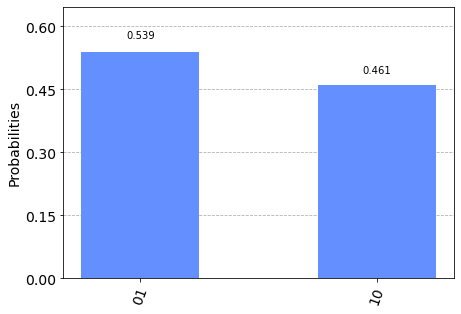

In [6]:

simulator = MoaraSimulator() #Moara(QasmBackendConfiguration.from_dict(config)) #Aer.get_backend('qasm_simulator')
counts = execute(circuit, simulator, shots=1024)
plot_histogram(counts)

In [37]:
config = { 'backend_name': 'moara',
        'backend_version': "0.1",
        'n_qubits': 20,
        'simulator': True,
        'local': True,
        'conditional': True,
        'memory': True,
        'open_pulse': False,
        'max_shots': int(1e6),
        'description': 'A rust simulator',
        'coupling_map': None,
        'basis_gates': None,
        # 'basis_gates': [
        #     'u1', 'u2', 'u3', 'cx', 'cz', 'id', 'x', 'y', 'z', 'h', 's', 'sdg',
        #     't', 'tdg', 'swap', 'ccx', 'unitary', 'diagonal', 'initialize',
        #     'cu1', 'cu2', 'cu3', 'cswap', 'mcx', 'mcy', 'mcz',
        #     'mcu1', 'mcu2', 'mcu3', 'mcswap', 'multiplexer', 'kraus', 'roerror'
        # ],
        'gates': []
}

a={'b': [        {
            'name': 'u1',
            'parameters': ['lam'],
            'conditional': True,
            'description': 'Single-qubit gate [[1, 0], [0, exp(1j*lam)]]',
            'qasm_def': 'gate u1(lam) q { U(0,0,lam) q; }'
        }, {
            'name': 'u2',
            'parameters': ['phi', 'lam'],
            'conditional': True,
            'description':
            'Single-qubit gate [[1, -exp(1j*lam)], [exp(1j*phi), exp(1j*(phi+lam))]]/sqrt(2)',
            'qasm_def': 'gate u2(phi,lam) q { U(pi/2,phi,lam) q; }'
        }, {
            'name':
            'u3',
            'parameters': ['theta', 'phi', 'lam'],
            'conditional':
            True,
            'description':
            'Single-qubit gate with three rotation angles',
            'qasm_def':
            'gate u3(theta,phi,lam) q { U(theta,phi,lam) q; }'
        }, {
            'name': 'cx',
            'parameters': [],
            'conditional': True,
            'description': 'Two-qubit Controlled-NOT gate',
            'qasm_def': 'gate cx c,t { CX c,t; }'
        }, {
            'name': 'cz',
            'parameters': [],
            'conditional': True,
            'description': 'Two-qubit Controlled-Z gate',
            'qasm_def': 'gate cz a,b { h b; cx a,b; h b; }'
        }, {
            'name': 'id',
            'parameters': [],
            'conditional': True,
            'description': 'Single-qubit identity gate',
            'qasm_def': 'gate id a { U(0,0,0) a; }'
        }, {
            'name': 'x',
            'parameters': [],
            'conditional': True,
            'description': 'Single-qubit Pauli-X gate',
            'qasm_def': 'gate x a { U(pi,0,pi) a; }'
        }, {
            'name': 'y',
            'parameters': [],
            'conditional': True,
            'description': 'Single-qubit Pauli-Y gate',
            'qasm_def': 'TODO'
        }, {
            'name': 'z',
            'parameters': [],
            'conditional': True,
            'description': 'Single-qubit Pauli-Z gate',
            'qasm_def': 'TODO'
        }, {
            'name': 'h',
            'parameters': [],
            'conditional': True,
            'description': 'Single-qubit Hadamard gate',
            'qasm_def': 'TODO'
        }, {
            'name': 's',
            'parameters': [],
            'conditional': True,
            'description': 'Single-qubit phase gate',
            'qasm_def': 'TODO'
        }, {
            'name': 'sdg',
            'parameters': [],
            'conditional': True,
            'description': 'Single-qubit adjoint phase gate',
            'qasm_def': 'TODO'
        }, {
            'name': 't',
            'parameters': [],
            'conditional': True,
            'description': 'Single-qubit T gate',
            'qasm_def': 'TODO'
        }, {
            'name': 'tdg',
            'parameters': [],
            'conditional': True,
            'description': 'Single-qubit adjoint T gate',
            'qasm_def': 'TODO'
        }, {
            'name': 'swap',
            'parameters': [],
            'conditional': True,
            'description': 'Two-qubit SWAP gate',
            'qasm_def': 'TODO'
        }, {
            'name': 'ccx',
            'parameters': [],
            'conditional': True,
            'description': 'Three-qubit Toffoli gate',
            'qasm_def': 'TODO'
        }, {
            'name': 'cswap',
            'parameters': [],
            'conditional': True,
            'description': 'Three-qubit Fredkin (controlled-SWAP) gate',
            'qasm_def': 'TODO'
        }, {
            'name': 'unitary',
            'parameters': ['matrix'],
            'conditional': True,
            'description': 'N-qubit unitary gate. '
                           'The parameter is the N-qubit matrix to apply.',
            'qasm_def': 'unitary(matrix) q1, q2,...'
        }, {
            'name': 'diagonal',
            'parameters': ['diag_elements'],
            'conditional': True,
            'description': 'N-qubit diagonal unitary gate. The parameters are the'
                           ' diagonal entries of the N-qubit matrix to apply.',
            'qasm_def': 'TODO'
        }, {
            'name': 'initialize',
            'parameters': ['vector'],
            'conditional': False,
            'description': 'N-qubit state initialize. '
                           'Resets qubits then sets statevector to the parameter vector.',
            'qasm_def': 'initialize(vector) q1, q2,...'
        }, {
            'name': 'cu1',
            'parameters': ['lam'],
            'conditional': True,
            'description': 'Two-qubit Controlled-u1 gate',
            'qasm_def': 'TODO'
        }, {
            'name': 'cu2',
            'parameters': ['phi', 'lam'],
            'conditional': True,
            'description': 'Two-qubit Controlled-u2 gate',
            'qasm_def': 'TODO'
        }, {
            'name': 'cu3',
            'parameters': ['theta', 'phi', 'lam'],
            'conditional': True,
            'description': 'Two-qubit Controlled-u3 gate',
            'qasm_def': 'TODO'
        }, {
            'name': 'mcx',
            'parameters': [],
            'conditional': True,
            'description': 'N-qubit multi-controlled-X gate',
            'qasm_def': 'TODO'
        }, {
            'name': 'mcy',
            'parameters': [],
            'conditional': True,
            'description': 'N-qubit multi-controlled-Y gate',
            'qasm_def': 'TODO'
        }, {
            'name': 'mcz',
            'parameters': [],
            'conditional': True,
            'description': 'N-qubit multi-controlled-Z gate',
            'qasm_def': 'TODO'
        }, {
            'name': 'mcu1',
            'parameters': ['lam'],
            'conditional': True,
            'description': 'N-qubit multi-controlled-u1 gate',
            'qasm_def': 'TODO'
        }, {
            'name': 'mcu2',
            'parameters': ['phi', 'lam'],
            'conditional': True,
            'description': 'N-qubit multi-controlled-u2 gate',
            'qasm_def': 'TODO'
        }, {
            'name': 'mcu3',
            'parameters': ['theta', 'phi', 'lam'],
            'conditional': True,
            'description': 'N-qubit multi-controlled-u3 gate',
            'qasm_def': 'TODO'
        }, {
            'name': 'mcswap',
            'parameters': [],
            'conditional': True,
            'description': 'N-qubit multi-controlled-SWAP gate',
            'qasm_def': 'TODO'
        }, {
            'name': 'multiplexer',
            'parameters': ['mat1', 'mat2', '...'],
            'conditional': True,
            'description': 'N-qubit multi-plexer gate. '
                           'The input parameters are the gates for each value.',
            'qasm_def': 'TODO'
        }, {
            'name': 'kraus',
            'parameters': ['mat1', 'mat2', '...'],
            'conditional': True,
            'description': 'N-qubit Kraus error instruction. '
                           'The input parameters are the Kraus matrices.',
            'qasm_def': 'TODO'
        }, {
            'name': 'roerror',
            'parameters': ['matrix'],
            'conditional': False,
            'description': 'N-bit classical readout error instruction. '
                           'The input parameter is the readout error probability matrix.',
            'qasm_def': 'TODO'
        }]
}